# Soccer Data
This dataset ([source](https://data.world/chas/2018-2019-premier-league-matches)) contains data of every game from the 2018-2019 season in the English Premier League. For every game and every team, you can explore lots of variables such as goals scored, yellow/red cards received, shots on target, etc.   


In [9]:
# Load packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Load your data

In [36]:
df = pd.read_csv("soccer18-19.csv")
df.head(20)


Div        Date        HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  \
0   E0     10/8/18      Man United       Leicester     2     1   H     1   
1   E0     11/8/18     Bournemouth         Cardiff     2     0   H     1   
2   E0     11/8/18          Fulham  Crystal Palace     0     2   A     0   
3   E0     11/8/18    Huddersfield         Chelsea     0     3   A     0   
4   E0     11/8/18       Newcastle       Tottenham     1     2   A     1   
5   E0     11/8/18         Watford        Brighton     2     0   H     1   
6   E0     11/8/18          Wolves         Everton     2     2   D     1   
7   E0     12/8/18         Arsenal        Man City     0     2   A     0   
8   E0     12/8/18       Liverpool        West Ham     4     0   H     2   
9   E0     12/8/18     Southampton         Burnley     0     0   D     0   
10  E0  18/08/2018         Cardiff       Newcastle     0     0   D     0   
11  E0  18/08/2018         Chelsea         Arsenal     3     2   H     2   
12  E0  18/08/2018         Everton     Southampton     2     1   H     2   
13  E0  18/08/2018       Leicester          Wolves     2     0   H     2   
14  E0  18/08/2018       Tottenham          Fulham     3     1   H     1   
15  E0  18/08/2018        West Ham     Bournemouth     1     2   A     1   
16  E0  19/08/2018        Brighton      Man United     3     2   H     3   
17  E0  19/08/2018         Burnley         Watford     1     3   A     1   
18  E0  19/08/2018        Man City    Huddersfield     6     1   H     3   
19  E0  20/08/2018  Crystal Palace       Liverpool     0     2   A     0   

    HTAG HTR  ... HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  
0      0   H  ...   6    4  11   8   2   5   2   1   0   0  
1      0   H  ...   4    1  11   9   7   4   1   1   0   0  
2      1   A  ...   6    9   9  11   5   5   1   2   0   0  
3      2   A  ...   1    4   9   8   2   5   2   1   0   0  
4      2   A  ...   2    5  11  12   3   5   2   2   0   0  
5      0   H  ...   5    0  10  16   8   2   2   2   0   0  
6      1   D  ...   4    5   8   7   3   6   0   1   0   1  
7      1   A  ...   3    8  11  14   2   9   2   2   0   0  
8      0   H  ...   8    2  14   9   5   4   1   2   0   0  
9      0   D  ...   3    6  10   9   8   5   0   1   0   0  
10     0   D  ...   1    6  14  16   5   5   2   2   0   1  
11     2   D  ...  11    6  12   9   5   1   0   2   0   0  
12     0   H  ...   7    4   8  20   2   5   0   5   0   0  
13     0   H  ...   2    3  10   8   1   9   2   1   1   0  
14     0   H  ...  11    3   9   5   5   2   0   0   0   0  
15     0   H  ...   5    5  14  10   6   4   6   2   0   0  
16     1   H  ...   3    3  16  13   3   5   1   1   0   0  
17     1   D  ...   3    6   8  19   5   2   1   2   0   0  
18     1   H  ...  14    1   9   4  10   3   0   2   0   0  
19     1   A  ...   2    6   6  13   6   7   1   1   1   0  

[20 rows x 23 columns]

## Understand your variables

In [3]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]

# There is also a csv file consisting of an explanation of the different variables. 
# We will join this with the variables dataframe.
var_dict = pd.read_csv('variable_explanation.csv', index_col=0)
variables.set_index('Variable').join(var_dict)

Number of unique values  \
Variable                           
Div                            1   
Date                         108   
HomeTeam                      20   
AwayTeam                      20   
FTHG                           7   
FTAG                           7   
FTR                            3   
HTHG                           5   
HTAG                           4   
HTR                            3   
Referee                       18   
HS                            33   
AS                            24   
HST                           14   
AST                           13   
HF                            21   
AF                            19   
HC                            16   
AC                            15   
HY                             7   
AY                             6   
HR                             2   
AR                             3   

                                                     Values  \
Variable                                                      
Div                                                    [E0]   
Date      [10/8/18, 11/8/18, 12/8/18, 18/08/2018, 19/08/...   
HomeTeam  [Man United, Bournemouth, Fulham, Huddersfield...   
AwayTeam  [Leicester, Cardiff, Crystal Palace, Chelsea, ...   
FTHG                                  [2, 0, 1, 4, 3, 6, 5]   
FTAG                                  [1, 0, 2, 3, 5, 4, 6]   
FTR                                               [H, A, D]   
HTHG                                        [1, 0, 2, 3, 4]   
HTAG                                           [0, 1, 2, 3]   
HTR                                               [H, A, D]   
Referee   [A Marriner, K Friend, M Dean, C Kavanagh, M A...   
HS        [8, 12, 15, 6, 19, 11, 9, 18, 24, 13, 25, 32, ...   
AS        [13, 10, 15, 6, 17, 5, 16, 12, 11, 9, 14, 8, 1...   
HST          [6, 4, 1, 2, 5, 3, 8, 11, 7, 14, 10, 12, 9, 0]   
AST              [4, 1, 9, 5, 0, 8, 2, 6, 3, 11, 10, 7, 12]   
HF        [11, 9, 10, 8, 14, 12, 16, 6, 13, 5, 7, 17, 15...   
AF        [8, 9, 11, 12, 16, 7, 14, 20, 5, 10, 13, 19, 4...   
HC        [2, 7, 5, 3, 8, 1, 6, 10, 4, 9, 12, 11, 14, 13...   
AC        [5, 4, 2, 6, 9, 1, 3, 7, 0, 10, 8, 12, 11, 13,...   
HY                                    [2, 1, 0, 6, 3, 4, 5]   
AY                                       [1, 2, 5, 0, 3, 4]   
HR                                                   [0, 1]   
AR                                                [0, 1, 2]   

                                           Explanation  
Variable                                                
Div                    Division the game was played in  
Date                      The date the game was played  
HomeTeam                                 The home team  
AwayTeam                                 The away team  
FTHG                              Full time home goals  
FTAG                              Full time away goals  
FTR                                   Full time result  
HTHG                              Half time home goals  
HTAG                              Half time away goals  
HTR                                   Half time result  
Referee                        The referee of the game  
HS                  Number of shots taken by home team  
AS                  Number of shots taken by away team  
HST       Number of shots taken by home team on target  
AST       Number of shots taken by away team on target  
HF                   Number of fouls made by home team  
AF                   Number of fouls made by away team  
HC                Number of corners taken by home team  
AC                Number of corners taken by away team  
HY        Number of yellow cards received by home team  
AY        Number of yellow cards received by away team  
HR           Number of red cards received by home team  
AR           Number of red cards received by away team

## Answer interesting questions: 
Now you get to explore this exciting dataset! Can't think of where to start? Try your hand at these questions:
- What team commits the most fouls?
- What team has the mosts shots on target compared to shots taken?
- Are there any referees that are biased and prefer certain teams?
- Try to predict the outcome of a game by the stats at half time.

In [4]:
# Start coding 
df.describe()

FTHG        FTAG        HTHG        HTAG          HS          AS  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  380.000000   
mean     1.568421    1.252632    0.678947    0.573684   14.134211   11.144737   
std      1.312836    1.180031    0.860802    0.766958    5.855371    4.654002   
min      0.000000    0.000000    0.000000    0.000000    0.000000    2.000000   
25%      1.000000    0.000000    0.000000    0.000000   10.000000    8.000000   
50%      1.000000    1.000000    0.000000    0.000000   14.000000   11.000000   
75%      2.000000    2.000000    1.000000    1.000000   18.000000   14.000000   
max      6.000000    6.000000    4.000000    3.000000   36.000000   25.000000   

              HST         AST          HF          AF          HC          AC  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  380.000000   
mean     4.778947    3.928947   10.152632   10.305263    5.705263    4.552632   
std      2.677686    2.283982    3.293532    3.503707    2.971718    2.730627   
min      0.000000    0.000000    0.000000    3.000000    0.000000    0.000000   
25%      3.000000    2.000000    8.000000    8.000000    4.000000    2.750000   
50%      5.000000    4.000000   10.000000   10.000000    5.000000    4.000000   
75%      6.000000    5.250000   12.000000   13.000000    8.000000    6.000000   
max     14.000000   12.000000   23.000000   21.000000   16.000000   14.000000   

               HY          AY          HR          AR  
count  380.000000  380.000000  380.000000  380.000000  
mean     1.526316    1.684211    0.047368    0.076316  
std      1.222844    1.209140    0.212706    0.275599  
min      0.000000    0.000000    0.000000    0.000000  
25%      1.000000    1.000000    0.000000    0.000000  
50%      1.000000    2.000000    0.000000    0.000000  
75%      2.000000    2.000000    0.000000    0.000000  
max      6.000000    5.000000    1.000000    2.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Div       380 non-null    object
 1   Date      380 non-null    object
 2   HomeTeam  380 non-null    object
 3   AwayTeam  380 non-null    object
 4   FTHG      380 non-null    int64 
 5   FTAG      380 non-null    int64 
 6   FTR       380 non-null    object
 7   HTHG      380 non-null    int64 
 8   HTAG      380 non-null    int64 
 9   HTR       380 non-null    object
 10  Referee   380 non-null    object
 11  HS        380 non-null    int64 
 12  AS        380 non-null    int64 
 13  HST       380 non-null    int64 
 14  AST       380 non-null    int64 
 15  HF        380 non-null    int64 
 16  AF        380 non-null    int64 
 17  HC        380 non-null    int64 
 18  AC        380 non-null    int64 
 19  HY        380 non-null    int64 
 20  AY        380 non-null    int64 
 21  HR        380 no

In [7]:
pd.isna(df).sum()

Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [11]:
df['Goals'] = df['FTHG'] + df['FTAG']
df = df.reset_index()

Text(0, 0.5, 'Goals')

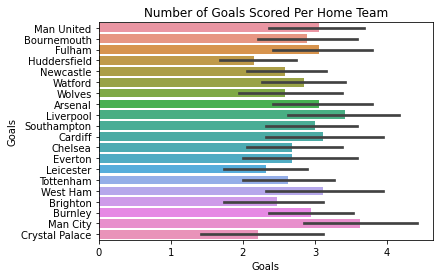

In [16]:
sns.barplot('Goals','HomeTeam',   data = df)
plt.title('Number of Goals Scored Per Home Team') 
plt.ylabel('Goals')

In [19]:
# Check if the Dataset is Balanced
df["FTR"].value_counts()

H    181
A    128
D     71
Name: FTR, dtype: int64

Text(0, 0.5, 'Count')

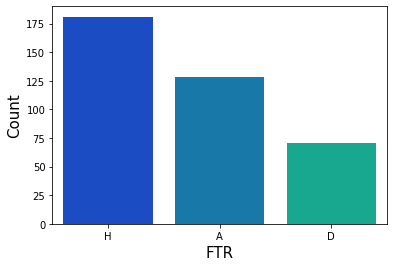

In [20]:
sns.countplot(data=df,x="FTR",palette="winter",)
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("Count",size=15,color="Black")

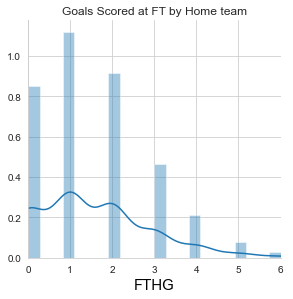

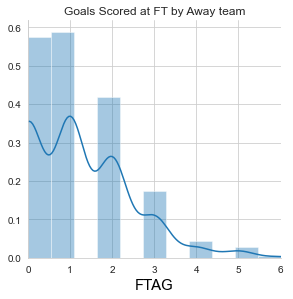

In [21]:
sns.set_style("whitegrid")
a=sns.FacetGrid(df,size=4) \
   .map(sns.distplot,"FTHG") \
   .add_legend()
plt.xlim(0,6)
plt.xlabel("FTHG",size=15,color="Black")
plt.title("Goals Scored at FT by Home team")
plt.show()
sns.set_style("whitegrid")
sns.FacetGrid(df,size=4,) \
   .map(sns.distplot,"FTAG") \
   .add_legend()
plt.xlabel("FTAG",size=15,color="Black")
plt.title("Goals Scored at FT by Away team")
plt.xlim(0,6)
plt.show()

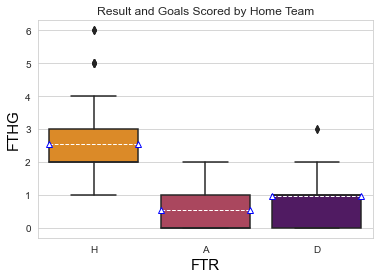

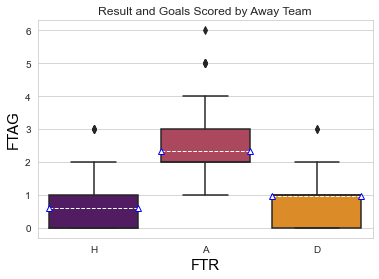

In [22]:
sns.boxplot(data=df,x="FTR",y="FTHG",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Goals Scored by Home Team")
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("FTHG",size=15,color="Black")
plt.show()

sns.boxplot(data=df,x="FTR",y="FTAG",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Goals Scored by Away Team")
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("FTAG",size=15,color="Black")
plt.show()

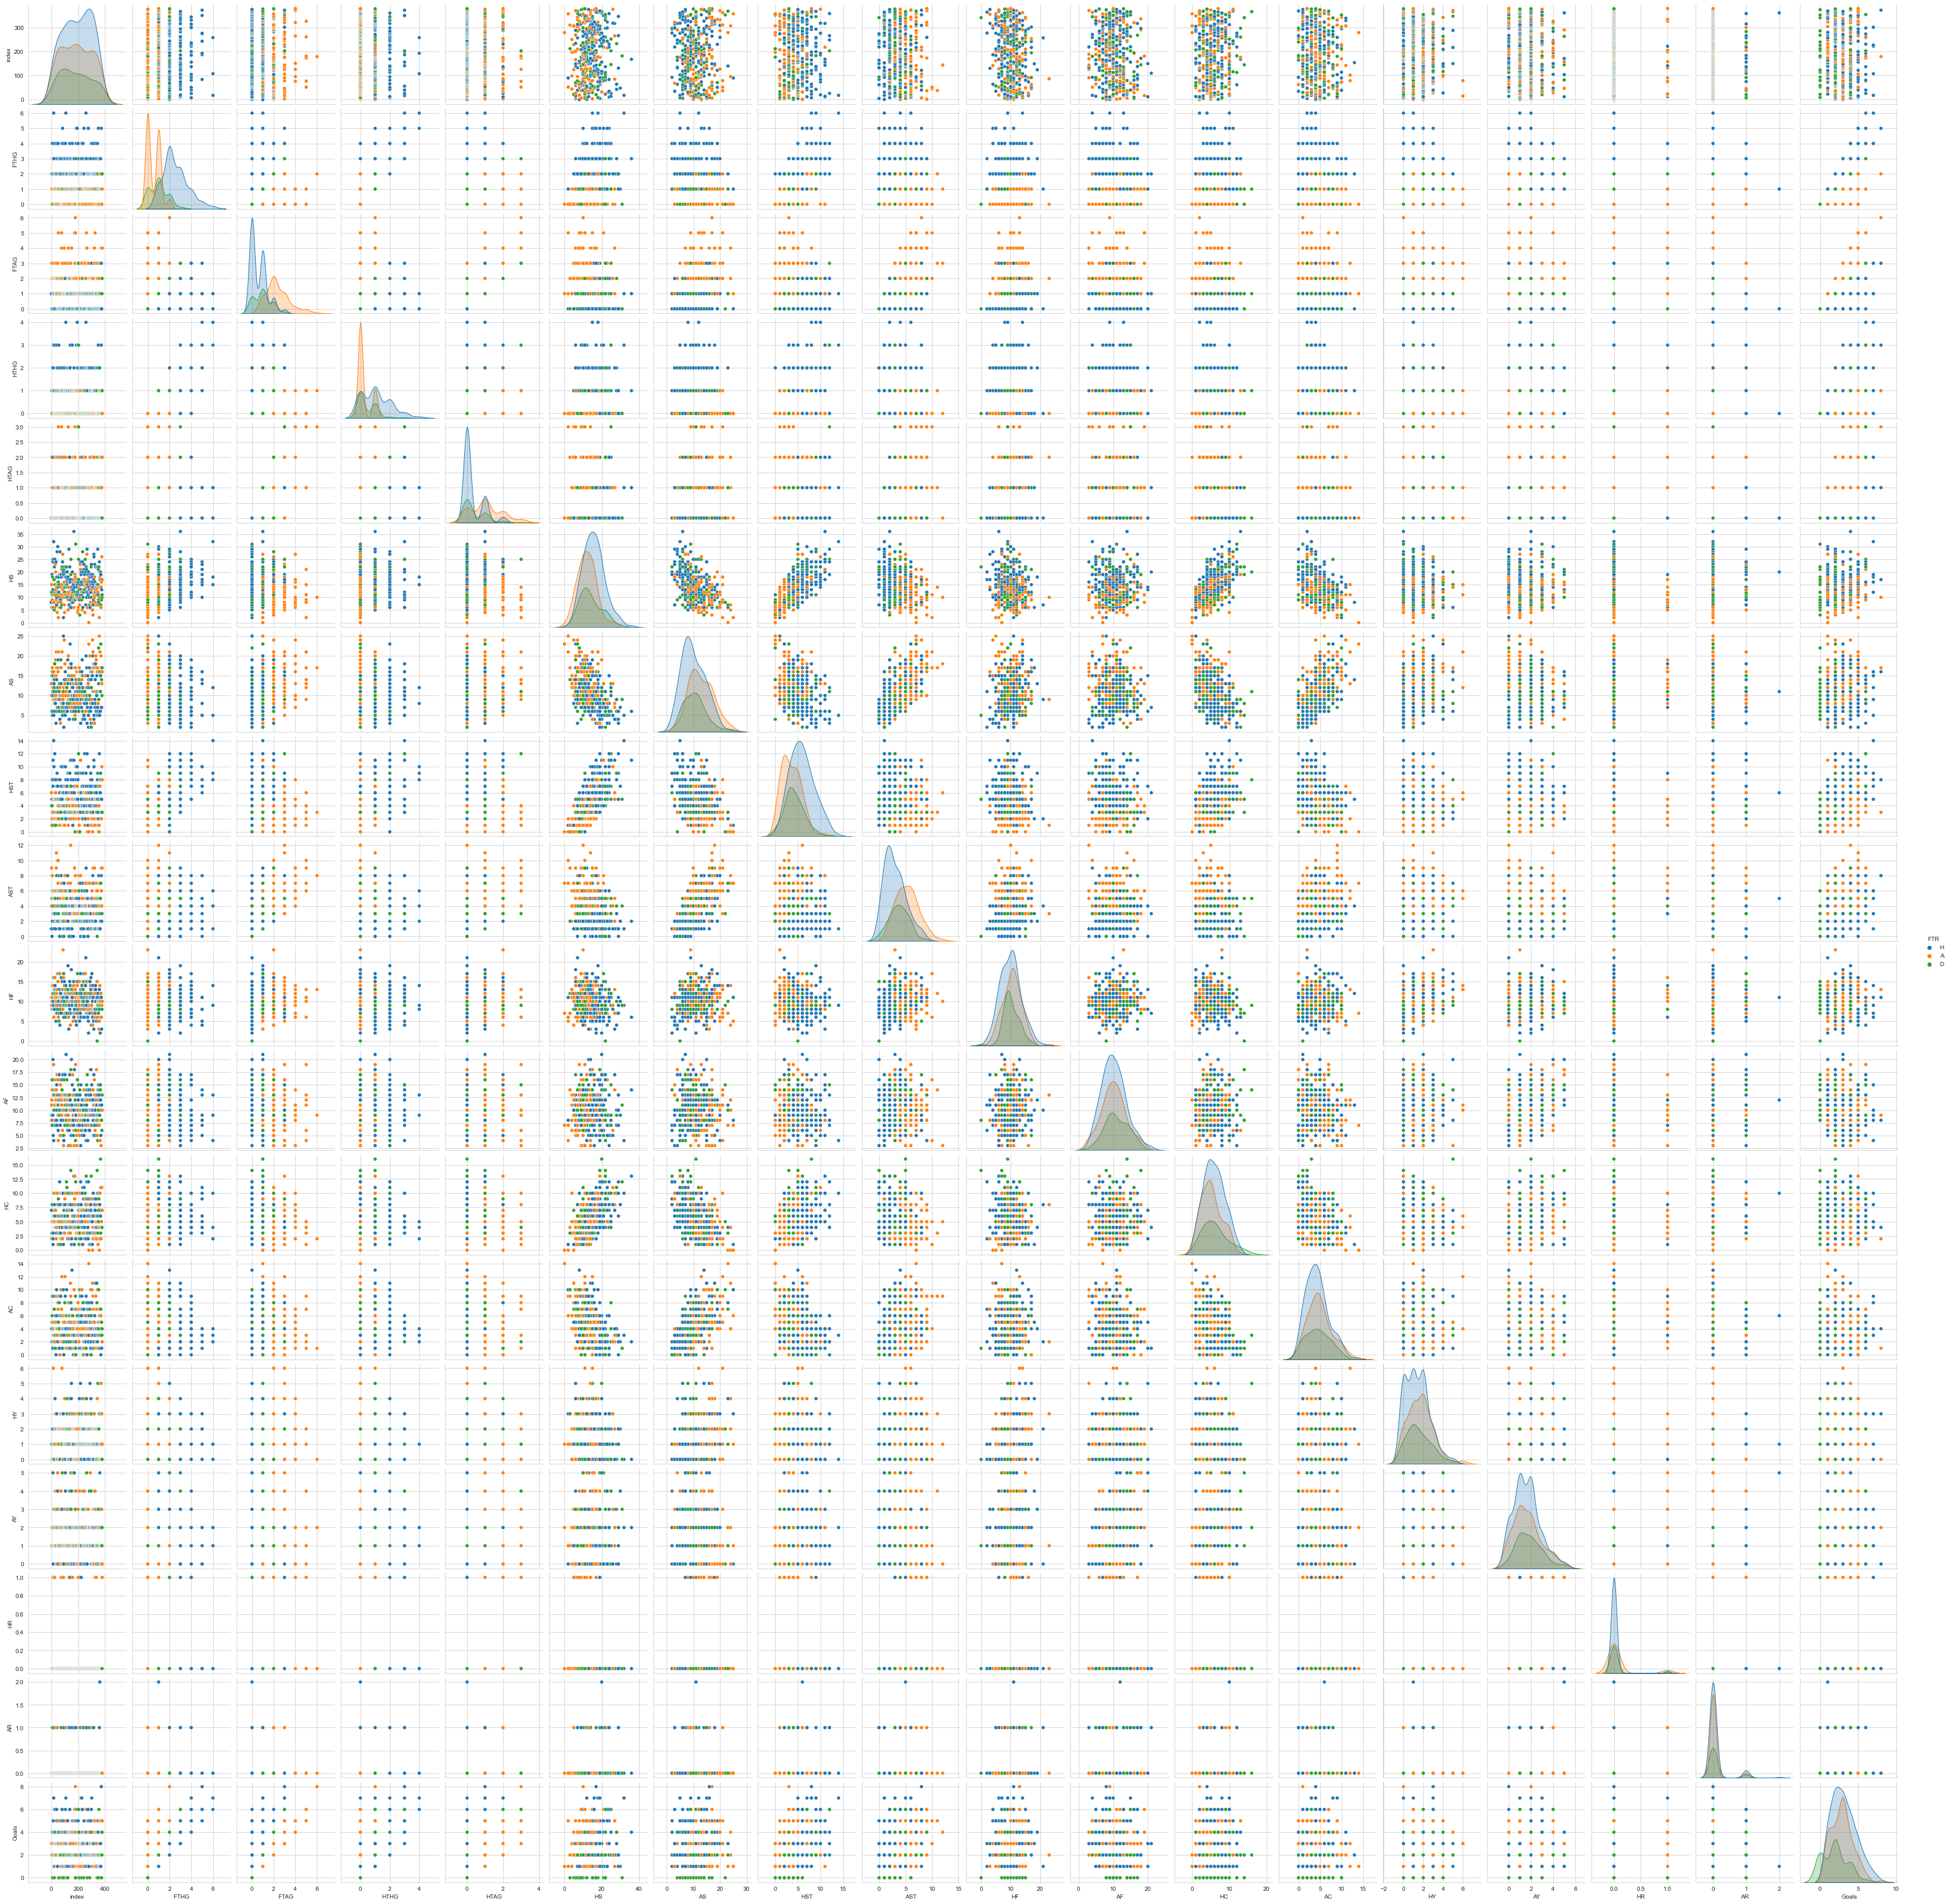

In [23]:
sns.pairplot(df,hue="FTR")

Text(0, 0.5, 'Count')

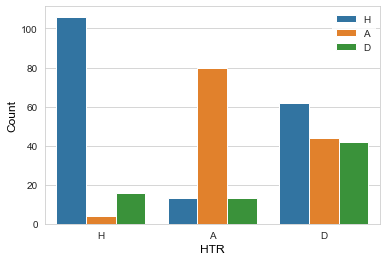

In [25]:
# Check If a team is Winning at HalfTime does it Change at Full Time.
sns.countplot(data=df,x="HTR",hue="FTR")
plt.legend(edgecolor="White",facecolor="White")
plt.xlabel("HTR",size=12,color="Black")
plt.ylabel("Count",size=12,color="Black")

In [44]:
dfQ1 = df[['Date','HS',"AS","HST", "AST"]]
frameQ1 = dfQ1.rename({'HS':'Home Shots', 'AS': 'Away Shots', 'HST': 'Home Shots on Target', 'AST': 'Away Shots on Target'}, axis=1, inplace=False)

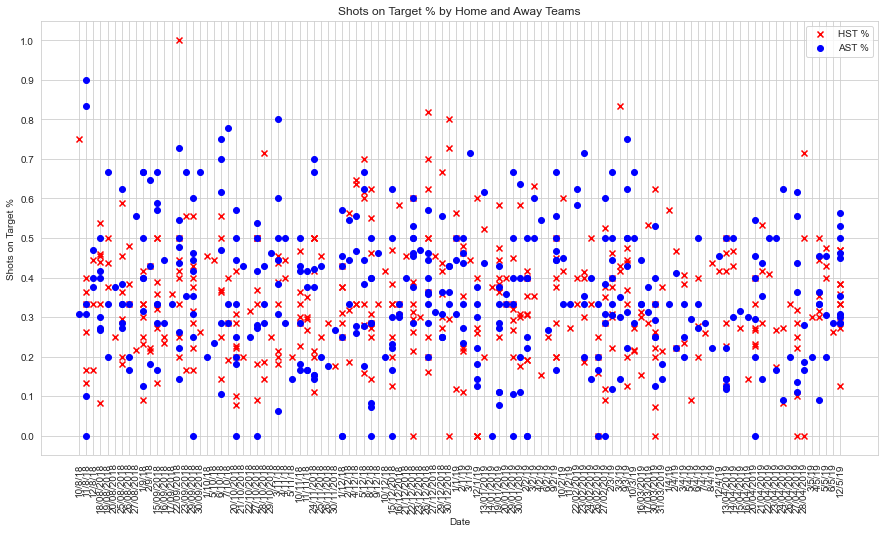

In [42]:
def clinicalShotsOnTarget():
    #select needed columns from dataset
    dfQ1 = df[['Date','HS',"AS","HST", "AST"]]
    frameQ1 = dfQ1.rename({'HS':'Home Shots', 'AS': 'Away Shots', 'HST': 'Home Shots on Target', 'AST': 'Away Shots on Target'}, axis=1, inplace=False)
    
    #create columns for shots on target percentage for home and away teams
    frameQ1['Home ST %'] = frameQ1['Home Shots on Target']/frameQ1['Home Shots']
    frameQ1['Away ST %'] = frameQ1['Away Shots on Target']/frameQ1['Away Shots']
    
    #set figure big enough to accomodate plot
    f = plt.figure() 
    f.set_figwidth(15) 
    f.set_figheight(8)
    
    #plot percentages on scatterplot with date as x variable
    plt.scatter(frameQ1['Date'], frameQ1['Home ST %'], marker ='x', color = 'r', label='HST %')
    plt.scatter(frameQ1['Date'], frameQ1['Away ST %'], marker ='o', color = 'b', label='AST %')
    
     #Plot labeling
    #plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
    plt.legend(loc='best')
    plt.title('Shots on Target % by Home and Away Teams')
    plt.xlabel('Date')
    plt.ylabel('Shots on Target %')
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xticks(rotation = 90)
    plt.show()
    

clinicalShotsOnTarget()

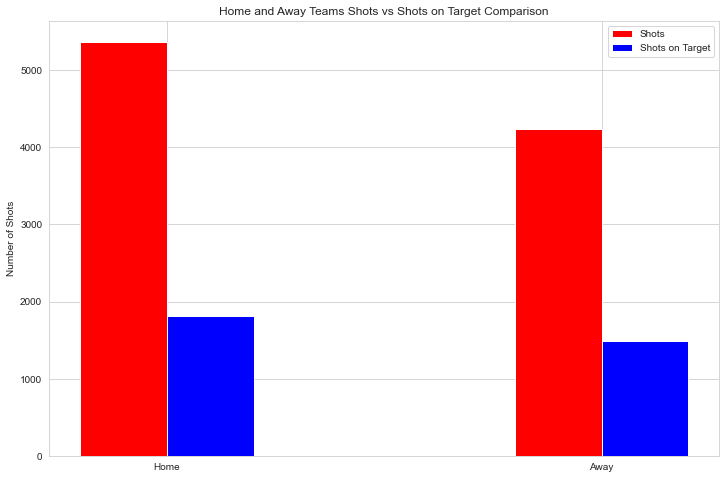

In [45]:
#initiate counting variables
homeS = 0
awayS = 0
homeSOT = 0
awaySOT = 0

for i in df.index:
    homeS += (frameQ1['Home Shots'][i])
    awayS += (frameQ1['Away Shots'][i])
    homeSOT += (frameQ1['Home Shots on Target'][i])
    awaySOT += (frameQ1['Away Shots on Target'][i])
    
#set figure big enough to accomodate plot
f = plt.figure() 
f.set_figwidth(12) 
f.set_figheight(8) 

#number of groupings of bars wanted and width of each bar
numberBars = 2
widthOfBar = 0.2

#values of shots and shots on target for home and away teams
shotsBar = (homeS, awayS)
SOTBar = (homeSOT, awaySOT)

#positioning of groupings of bars
ind = np.arange(numberBars)


#plotting side by side bar charts
plt.bar(ind, shotsBar, widthOfBar, label="Shots", color='r')
plt.bar(ind+ widthOfBar, SOTBar, widthOfBar, label="Shots on Target", color='b')

#plot labels and titles
plt.xticks((ind + widthOfBar/2), ('Home', 'Away'))
plt.ylabel('Number of Shots')
# plt.yticks(np.arange(0,homeS + 1,1))
plt.title('Home and Away Teams Shots vs Shots on Target Comparison')
plt.legend(loc='best')

plt.show()

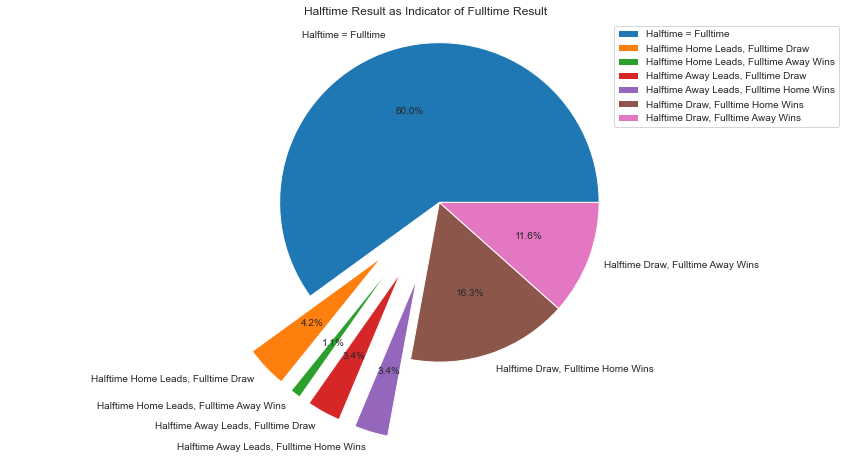

In [46]:
def halfToFullCompare():
    #select needed columns from dataset
    dfQ2 = df[['Date','HomeTeam','AwayTeam','HTR','FTR']]
    frameQ2 = dfQ2.rename({'HTR':'Halftime Result', 'FTR': 'Fulltime Result'}, axis=1, inplace=False)
    
    
    #count the instances of possible permutation of halftime to fulltime results
    halfFullSame = 0
    halfHomeLeadFullDraw = 0
    halfHomeLeadFullAway = 0
    halfAwayLeadFullDraw = 0
    halfAwayLeadFullHome = 0
    halfDrawFullHome = 0
    halfDrawFullAway = 0
    for index, row in frameQ2.iterrows():
        if row['Halftime Result'] == row['Fulltime Result']:
            halfFullSame += 1
        elif row['Halftime Result'] == "H" and row['Fulltime Result'] == "D":
            halfHomeLeadFullDraw += 1
        elif row['Halftime Result'] == "H" and row['Fulltime Result'] == "A":
            halfHomeLeadFullAway += 1
        elif row['Halftime Result'] == "A" and row['Fulltime Result'] == "D":
            halfAwayLeadFullDraw += 1
        elif row['Halftime Result'] == "A" and row['Fulltime Result'] == "H":
            halfAwayLeadFullHome += 1
        elif row['Halftime Result'] == "D" and row['Fulltime Result'] == "H":
            halfDrawFullHome += 1
        elif row['Halftime Result'] == "D" and row['Fulltime Result'] == "A":
            halfDrawFullAway += 1
            
    #set figure big enough to accomodate plot
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(8) 
    
    #create pie chart, explode small slices
    resultsQ2 = ['Halftime = Fulltime', 'Halftime Home Leads, Fulltime Draw', 'Halftime Home Leads, Fulltime Away Wins', 'Halftime Away Leads, Fulltime Draw','Halftime Away Leads, Fulltime Home Wins', 'Halftime Draw, Fulltime Home Wins', 'Halftime Draw, Fulltime Away Wins']
    occurencesQ2 = [halfFullSame, halfHomeLeadFullDraw, halfHomeLeadFullAway, halfAwayLeadFullDraw, halfAwayLeadFullHome, halfDrawFullHome, halfDrawFullAway]
    plt.pie(occurencesQ2, labels=resultsQ2, autopct='%.1f%%', startangle=0,explode=[0, 0.5, 0.5, 0.5, 0.5, 0, 0])
    
    
    #plot labels
    plt.title('Halftime Result as Indicator of Fulltime Result')
    plt.legend(resultsQ2, loc='upper right')
    plt.axis('equal')
    plt.show()


halfToFullCompare()
    

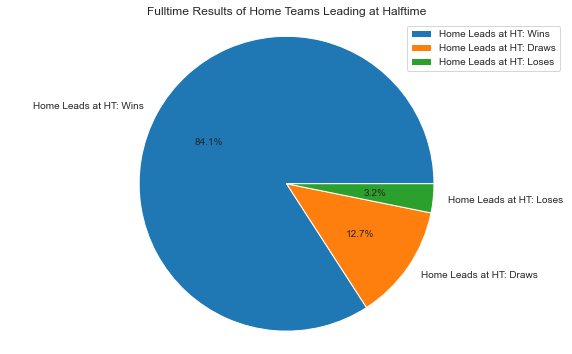

In [47]:
#select needed columns from dataset
dfQ3 = df[['Date','HomeTeam','AwayTeam','HTHG', 'HTAG','FTR']]
frameQ3 = dfQ3.rename({'HTHG':'Halftime Home Goals', 'HTAG':'Halftime Away Goals', 'FTR': 'Fulltime Result'}, axis=1, inplace=False)


#initiate counting variables
homeGoodResult = 0
homeBadResult = 0
homeEmbarrasingResult = 0

#iterate through each row to find each possible permutation for results
for index, row in frameQ3.iterrows():
    if row['Halftime Home Goals'] > row['Halftime Away Goals'] and row['Fulltime Result'] == "H":
        homeGoodResult += 1
    elif row['Halftime Home Goals'] > row['Halftime Away Goals'] and row['Fulltime Result'] == "D":
        homeBadResult += 1
    elif row['Halftime Home Goals'] > row['Halftime Away Goals'] and row['Fulltime Result'] == "A":
        homeEmbarrasingResult += 1

        
#set figure big enough to accomodate plot
f = plt.figure() 
f.set_figwidth(10) 
f.set_figheight(6) 


#create pie chart
resultsQ3 = ['Home Leads at HT: Wins', 'Home Leads at HT: Draws', 'Home Leads at HT: Loses']
occurencesQ3 = [homeGoodResult, homeBadResult, homeEmbarrasingResult]

plt.pie(occurencesQ3, labels=resultsQ3, autopct='%.1f%%', startangle=0, explode=[0, 0, 0])

#plot labels
plt.title('Fulltime Results of Home Teams Leading at Halftime')
plt.legend(resultsQ3, loc='upper right')
plt.axis('equal')
plt.show()

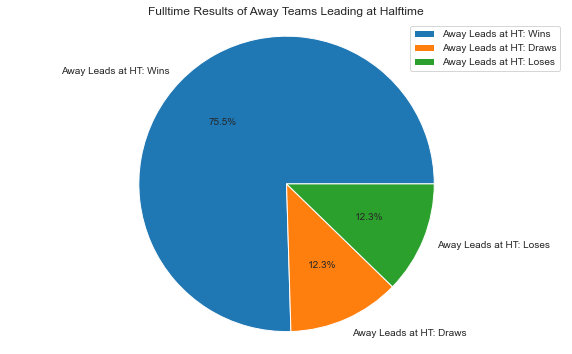

In [48]:
#select needed columns from dataset
dfQ4 = df[['Date','HomeTeam','AwayTeam','HTHG', 'HTAG','FTR']]
frameQ4 = dfQ4.rename({'HTHG':'Halftime Home Goals', 'HTAG':'Halftime Away Goals', 'FTR': 'Fulltime Result'}, axis=1, inplace=False)

#initiate counting variables
awayExcellentResult = 0
awayOkResult = 0
awaySadResult = 0

#iterate through rows to find all possible permutations of results
for index, row in frameQ4.iterrows():
    if row['Halftime Home Goals'] < row['Halftime Away Goals'] and row['Fulltime Result'] == "A":
        awayExcellentResult += 1
    elif row['Halftime Home Goals'] < row['Halftime Away Goals'] and row['Fulltime Result'] == "D":
        awayOkResult += 1
    elif row['Halftime Home Goals'] < row['Halftime Away Goals'] and row['Fulltime Result'] == "H":
        awaySadResult += 1

#set figure big enough to accomodate plot
f = plt.figure() 
f.set_figwidth(10) 
f.set_figheight(6) 

#create pie chart
resultsQ4 = ['Away Leads at HT: Wins', 'Away Leads at HT: Draws', 'Away Leads at HT: Loses']
occurencesQ4 = [awayExcellentResult, awayOkResult, awaySadResult]

plt.pie(occurencesQ4, labels=resultsQ4, autopct='%.1f%%', startangle=0,
        explode=[0, 0, 0])

#plot labels
plt.title('Fulltime Results of Away Teams Leading at Halftime')
plt.legend(resultsQ4, loc='upper right')
plt.axis('equal')
plt.show()

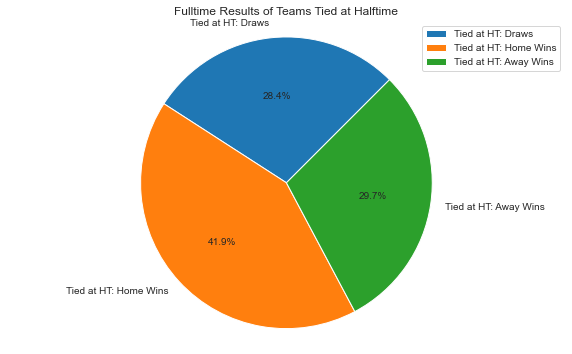

In [49]:

#select needed columns from dataset
dfQ5 = df[['Date','HomeTeam','AwayTeam','HTHG', 'HTAG','FTR']]
frameQ5 = dfQ5.rename({'HTHG':'Halftime Home Goals', 'HTAG':'Halftime Away Goals', 'FTR': 'Fulltime Result'}, axis=1, inplace=False)

#initiate counting variables
neutralResult = 0
homeResult = 0
awayResult = 0

#iterate through rows to find all possible permutations of results
for index, row in frameQ5.iterrows():
    if row['Halftime Home Goals'] == row['Halftime Away Goals'] and row['Fulltime Result'] == "D":
        neutralResult += 1
    elif row['Halftime Home Goals'] == row['Halftime Away Goals'] and row['Fulltime Result'] == "H":
        homeResult += 1
    elif row['Halftime Home Goals'] == row['Halftime Away Goals'] and row['Fulltime Result'] == "A":
        awayResult += 1


#set figure big enough to accomodate plot
f = plt.figure() 
f.set_figwidth(10) 
f.set_figheight(6) 

#create pie chart
resultsQ5 = ['Tied at HT: Draws', 'Tied at HT: Home Wins', 'Tied at HT: Away Wins']
occurencesQ5 = [neutralResult, homeResult, awayResult]

plt.pie(occurencesQ5, labels=resultsQ5, autopct='%.1f%%', startangle=45,
        explode=[0, 0, 0])

#plot labels
plt.title('Fulltime Results of Teams Tied at Halftime')
plt.legend(resultsQ5, loc='upper right')
plt.axis('equal')
plt.show()

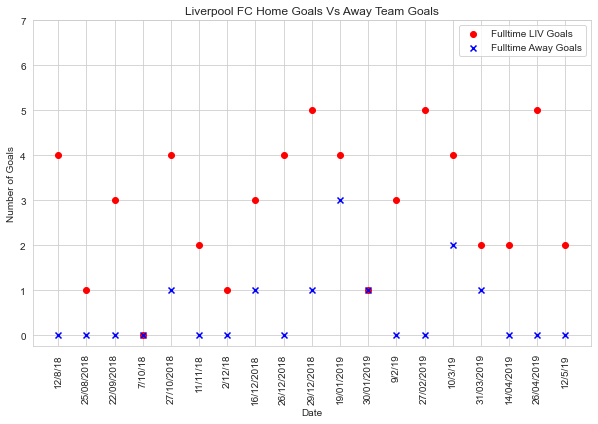

In [51]:
#create dataframe for Liverpool home games in the dataset
livHome = df[df["HomeTeam"] == "Liverpool"]

#create figure
f = plt.figure() 
f.set_figwidth(10) 
f.set_figheight(6) 

#scatter plot full time home goals for Liverpool and away goals for their opponents
plt.scatter(livHome['Date'], livHome['FTHG'], marker ='o', color = 'r', label='Fulltime LIV Goals')
plt.scatter(livHome['Date'], livHome['FTAG'], marker ='x', color = 'b', label='Fulltime Away Goals')

#plot labels
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30)) #30 day intervals to avoid clutter
plt.legend(loc='best')
plt.title('Liverpool FC Home Goals Vs Away Team Goals')
plt.xlabel('Date')
plt.ylabel('Number of Goals')
plt.yticks(np.arange(0, 8, 1))
plt.xticks(rotation = 90)

plt.show()

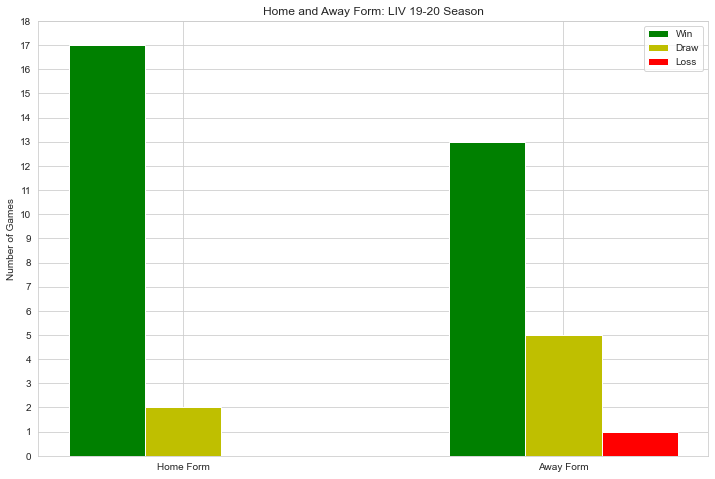

In [55]:
#create dataframe of Liverpool's 2019-2020 season from dataset. Also create dataframes of Liverpool's home and away fixtures in 2019-2020 season
liv1920 = df[((df['HomeTeam']=="Liverpool")|(df["AwayTeam"]=='Liverpool'))]

#home fixtures
liv1920HomeTemp = liv1920[liv1920['HomeTeam']=="Liverpool"]
liv1920Home = liv1920HomeTemp.reset_index()
del liv1920Home["index"]

#away fixtures
liv1920AwayTemp = liv1920[liv1920['AwayTeam']=="Liverpool"]
liv1920Away = liv1920AwayTemp.reset_index()
del liv1920Away["index"]

#initiate counting variables
homeWin = 0
homeDraw = 0
homeLoss = 0
awayWin = 0
awayDraw = 0
awayLoss = 0

#use .index to loop through home and away fixtures
for i in liv1920Home.index:
    #if the index of full time result column is a particular result, add to count of that type of result
    if liv1920Home["FTR"][i] == "H":
        homeWin += 1
    elif liv1920Home["FTR"][i] == "D":
        homeDraw += 1
    elif liv1920Home["FTR"][i] == "A":
        homeLoss += 1

for i in liv1920Away.index:
    if liv1920Away["FTR"][i] == "H":
        awayLoss += 1
    elif liv1920Away["FTR"][i] == "D":
        awayDraw += 1
    elif liv1920Away["FTR"][i] == "A":
        awayWin += 1

#set figure big enough to accomodate plot
f = plt.figure() 
f.set_figwidth(12) 
f.set_figheight(8) 

#number of groupings of bars wanted and width of each bar
numBars = 2
widthBar = 0.2

#values of home and away wins/draws/losses
wins = (homeWin, awayWin)
draws = (homeDraw, awayDraw)
losses = (homeLoss, awayLoss)

#positioning of groupings of bars
ind = np.arange(numBars)

#plotting side by side bar charts
plt.bar(ind, wins, widthBar, label="Win", color='g')
plt.bar(ind+ widthBar, draws, widthBar, label="Draw", color='y')
plt.bar(ind+ widthBar*2, losses, widthBar, label="Loss", color='r')

#plot labels and titles
plt.xticks((ind + widthBar), ('Home Form', 'Away Form'))
plt.ylabel('Number of Games')
plt.yticks(np.arange(0,19,1))
plt.title('Home and Away Form: LIV 19-20 Season')
plt.legend(loc='best')

plt.show()

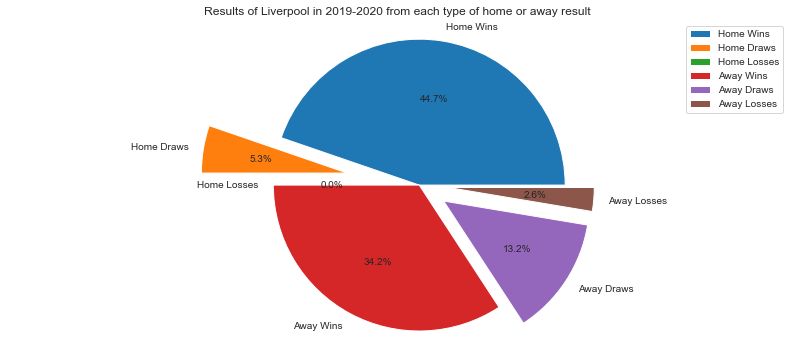

In [56]:
#set figure big enough to accomodate plot
f = plt.figure() 
f.set_figwidth(14) 
f.set_figheight(6) 

#create pie chart
resultsQ8 = ['Home Wins', 'Home Draws', 'Home Losses', 'Away Wins', 'Away Draws', 'Away Losses']
occurencesQ8 = [homeWin, homeDraw, homeLoss, awayWin, awayDraw, awayLoss]

plt.pie(occurencesQ8, labels=resultsQ8, autopct='%.1f%%', startangle=0,
        explode=[0, 0.5, 0, 0, 0.2, 0.2])

#plot labels
plt.title('Results of Liverpool in 2019-2020 from each type of home or away result')
plt.legend(resultsQ8, loc='upper right')
plt.axis('equal')
plt.show()

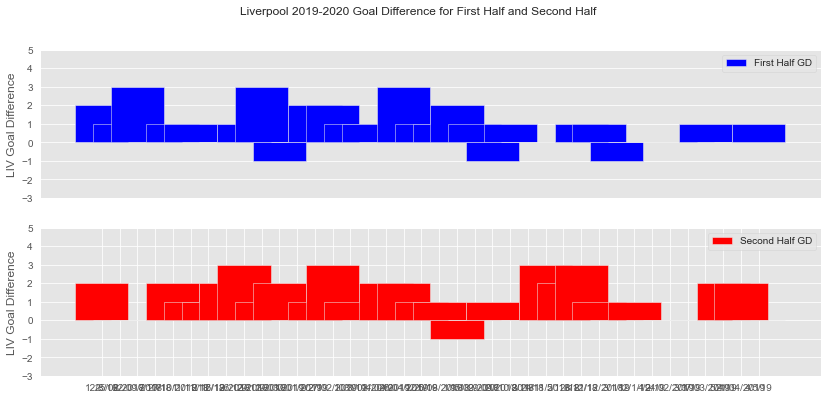

In [57]:
#create columns for first half goal difference and second half goal difference in home and away fixtures
liv1920Home['First Half Goal Difference'] = liv1920Home['HTHG'] - liv1920Home['HTAG']
liv1920Home['Second Half Goal Difference'] = liv1920Home['FTHG'] - liv1920Home['FTAG'] - liv1920Home['First Half Goal Difference']

liv1920Away['First Half Goal Difference'] = liv1920Away['HTAG'] - liv1920Away['HTHG']
liv1920Away['Second Half Goal Difference'] = liv1920Away['FTAG'] - liv1920Away['FTHG'] - liv1920Away['First Half Goal Difference']

#create subplots
plt.style.use('ggplot')
fig, ((ax1, ax2)) = plt.subplots(2, 1)
fig.set_figwidth(14) 
fig.set_figheight(6)

#set bar width
wid = 3

#stacked bar graph on the same plot using home and away data
ax1.bar(liv1920Home['Date'],liv1920Home['First Half Goal Difference'], width=wid, color = 'blue', label= 'First Half GD')
ax2.bar(liv1920Home['Date'],liv1920Home['Second Half Goal Difference'], width=wid, color = 'red',  label= 'Second Half GD')
ax1.bar(liv1920Away['Date'],liv1920Away['First Half Goal Difference'], width=wid, color = 'blue')
ax2.bar(liv1920Away['Date'],liv1920Away['Second Half Goal Difference'], width=wid, color = 'red')


#plot labels and titles
fig.suptitle('Liverpool 2019-2020 Goal Difference for First Half and Second Half')
ax1.set_ylabel('LIV Goal Difference')
ax1.set_xticks([])
ax1.set_yticks(np.arange(-3, 6, 1))
ax1.legend(loc="best")

ax2.set_ylabel('LIV Goal Difference')
ax2.set_yticks(np.arange(-3, 6, 1))
ax2.legend(loc="best")

plt.show()


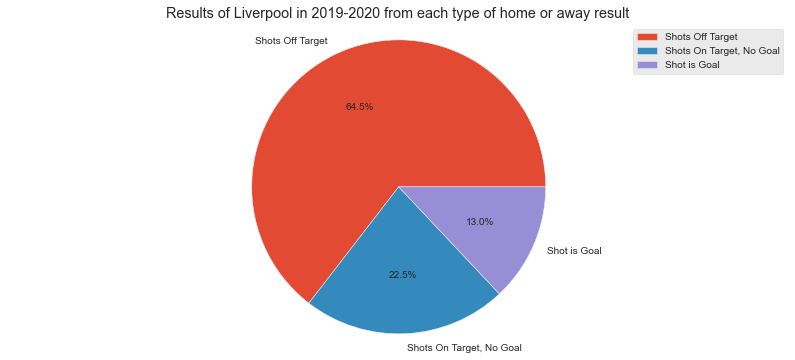

In [58]:
#initiate counting variables
homeShots = 0
homeShotsOnTarget = 0
homeGoals = 0
awayShots = 0
awayShotsOnTarget = 0
awayGoals = 0

#use .index to loop through home and away fixtures
for i in liv1920Home.index:
    homeShots += (liv1920Home['HS'][i])
    homeShotsOnTarget += (liv1920Home['HST'][i])
    homeGoals += (liv1920Home['FTHG'][i])

for i in liv1920Away.index:
    awayShots += (liv1920Away['HS'][i])
    awayShotsOnTarget += (liv1920Away['HST'][i])
    awayGoals += (liv1920Away['FTHG'][i])

#add results from home and away fixtures
totalShots = homeShots + awayShots
totalShotsOnTarget = homeShotsOnTarget + awayShotsOnTarget
totalGoals = homeGoals + awayGoals

#find total shots off target and shots on target that were saved
totalSOTNoGoal = totalShotsOnTarget - totalGoals
totalShotsOffTarget = totalShots - totalShotsOnTarget

#set figure big enough to accomodate plot
f = plt.figure() 
f.set_figwidth(14) 
f.set_figheight(6) 

#create pie chart
resultsQ10 = ['Shots Off Target', 'Shots On Target, No Goal', 'Shot is Goal']
occurencesQ10 = [totalShotsOffTarget, totalSOTNoGoal, totalGoals]

plt.pie(occurencesQ10, labels=resultsQ10, autopct='%.1f%%', startangle=0,
        explode=[0, 0, 0])

#plot labels
plt.title('Results of Liverpool in 2019-2020 from each type of home or away result')
plt.legend(resultsQ10, loc='upper right')
plt.axis('equal')

plt.show()